<a href="https://colab.research.google.com/github/farhanwew/Digital-Image-processing/blob/main/Edge%20merging%20using%20gradient-based%20criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Penyambungan Tepi dengan Kriteria Gradient dalam Pengolahan Citra Digital**

---

### 1. Konsep Penyambungan Tepi (Edge Linking)

Edge linking adalah proses menghubungkan fragmen tepi terdeteksi agar membentuk struktur yang lebih utuh. Setelah proses deteksi tepi (edge detection), sering kali hasilnya berupa potongan kecil garis atau kontur yang belum terhubung. Dengan menggunakan kriteria tertentu seperti arah dan besar gradient, kita dapat menyambungkan tepi-tepi ini menjadi bentuk objek yang lebih lengkap.

---

### 2. Kriteria Gradient untuk Penyambungan Tepi

Kriteria gradient memanfaatkan:
- **Magnitude gradient (besar perubahan intensitas)**
- **Arah gradient (orientasi perubahan intensitas)**

Penyambungan dilakukan dengan mempertimbangkan kontinuitas spasial dan arah gradient yang konsisten antara dua titik tepi yang berdekatan.

---

### 3. Contoh Pendekatan Penyambungan Tepi

#### a. Hysteresis Thresholding (digunakan pada Canny edge detector)
- Dua ambang batas ditentukan: high dan low.
- Tepi dengan magnitude > high dianggap tepi kuat.
- Tepi dengan magnitude antara low dan high disambungkan jika berdekatan dengan tepi kuat.

#### b. Edge Tracking by Gradient Direction
- Membandingkan arah gradient dan pixel sekitar dalam arah tersebut.
- Jika arah dan magnitudo serupa, maka dianggap sebagai bagian dari tepi yang sama.

---

### 4. Implementasi Python: Canny dengan Hysteresis Thresholding

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Deteksi tepi dengan Canny (sudah mencakup non-max suppression dan hysteresis)
edges = cv2.Canny(img, threshold1=50, threshold2=150)

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Hasil Edge Linking (Canny + Hysteresis)')
plt.axis('off')
plt.show()
```

---

### 5. Implementasi Manual Edge Tracking by Gradient Direction (Opsional Tingkat Lanjut)

```python
from scipy import ndimage

# Hitung gradient menggunakan Sobel
Gx = ndimage.sobel(img, axis=1)
Gy = ndimage.sobel(img, axis=0)

magnitude = np.hypot(Gx, Gy)
direction = np.arctan2(Gy, Gx) * 180 / np.pi

# Normalisasi arah gradient ke dalam 4 arah dominan (0, 45, 90, 135 derajat)
direction = (np.round(direction / 45) * 45) % 180

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(direction, cmap='hsv')
plt.title('Gradient Direction'), plt.axis('off')
plt.show()
```

---

### 6. Kesimpulan

Penyambungan tepi membantu menghasilkan kontur yang lebih utuh dari hasil deteksi tepi dengan mempertimbangkan arah dan besar gradient. Pendekatan umum seperti hysteresis thresholding digunakan dalam algoritma seperti Canny, sedangkan pendekatan manual dapat dilakukan dengan menganalisis arah gradient secara eksplisit. Penyambungan ini sangat penting dalam segmentasi dan ekstraksi fitur bentuk dari citra.



In [1]:
! wget https://hips.hearstapps.com/hmg-prod/images/west-virginia-gray-cottage-64dd6bb056057.jpg

--2025-05-05 07:06:28--  https://hips.hearstapps.com/hmg-prod/images/west-virginia-gray-cottage-64dd6bb056057.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2051419 (2.0M) [image/jpeg]
Saving to: ‘west-virginia-gray-cottage-64dd6bb056057.jpg’

west-virginia-gray- 100%[===================>]   1.96M  --.-KB/s    in 0.08s   

2025-05-05 07:06:28 (25.7 MB/s) - ‘west-virginia-gray-cottage-64dd6bb056057.jpg’ saved [2051419/2051419]



In [2]:
image = '/content/west-virginia-gray-cottage-64dd6bb056057.jpg'

# Implementasi Python: Canny dengan Hysteresis Thresholding

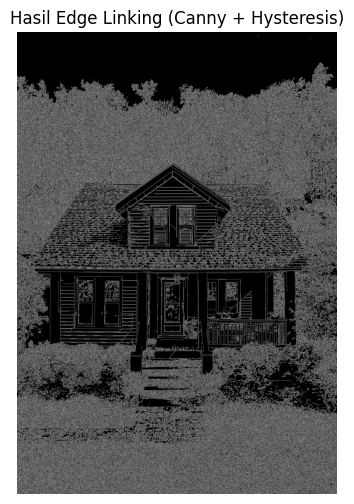

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Deteksi tepi dengan Canny (sudah mencakup non-max suppression dan hysteresis)
edges = cv2.Canny(img, threshold1=50, threshold2=150)

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Hasil Edge Linking (Canny + Hysteresis)')
plt.axis('off')
plt.show()

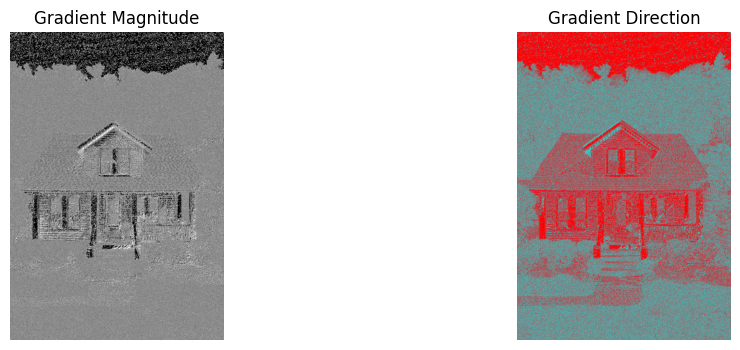

In [6]:
from scipy import ndimage

# Hitung gradient menggunakan Sobel
Gx = ndimage.sobel(img, axis=1)
Gy = ndimage.sobel(img, axis=0)

magnitude = np.hypot(Gx, Gy)
direction = np.arctan2(Gy, Gx) * 180 / np.pi

# Normalisasi arah gradient ke dalam 4 arah dominan (0, 45, 90, 135 derajat)
direction = (np.round(direction / 45) * 45) % 180

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(direction, cmap='hsv')
plt.title('Gradient Direction'), plt.axis('off')
plt.show()

#  Implementasi Manual Edge Tracking by Gradient Direction (Opsional Tingkat Lanjut)

**Penyambungan Tepi dengan Kriteria Gradient**

---

### 1. Konsep Penyambungan Tepi (Edge Linking)

Setelah proses deteksi tepi, hasilnya sering kali berupa garis-garis terputus atau fragmen yang belum membentuk batas objek secara lengkap. Penyambungan tepi (edge linking) bertujuan untuk menyambung fragmen tersebut menjadi kontur yang utuh.

Salah satu pendekatan adalah menggunakan **kriteria gradient**, yaitu dengan menyambung piksel-piksel tepi yang memiliki arah dan magnitude gradient yang konsisten.

---

### 2. Proses Umum Edge Linking dengan Gradient

1. Hitung magnitude dan arah gradient dari citra.
2. Identifikasi piksel yang termasuk dalam tepi (misal hasil dari operator Sobel atau Canny).
3. Cari piksel tetangga yang memiliki arah gradient serupa (dalam ambang tertentu).
4. Hubungkan piksel-piksel tersebut membentuk segmen tepi yang utuh.

---

### 3. Implementasi Python (Gradient-based Edge Linking)

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca dan konversi ke grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Hitung gradient menggunakan Sobel
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x) * 180 / np.pi

# Thresholding magnitude untuk deteksi tepi awal
edges = (magnitude > 100).astype(np.uint8)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude Gradient'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(edges, cmap='gray'), plt.title('Tepi Awal'), plt.axis('off')
plt.tight_layout()
plt.show()
```

---

### 4. Eksperimen Tambahan: Non-Maximum Suppression

Salah satu cara memperbaiki penyambungan adalah dengan menipiskan tepi berdasarkan arah gradient (mirip metode Canny).

```python
def non_max_suppression(magnitude, direction):
    M, N = magnitude.shape
    output = np.zeros((M, N), dtype=np.float32)
    angle = direction % 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255
            
            # arah 0°
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            # arah 45°
            elif (22.5 <= angle[i,j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            # arah 90°
            elif (67.5 <= angle[i,j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            # arah 135°
            elif (112.5 <= angle[i,j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]
            
            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                output[i,j] = magnitude[i,j]
            else:
                output[i,j] = 0
    return output

nms_result = non_max_suppression(magnitude, direction)

plt.figure(figsize=(6, 4))
plt.imshow(nms_result, cmap='gray')
plt.title('Hasil Non-Maximum Suppression')
plt.axis('off')
plt.show()
```

---

### 5. Eksperimen: Pengaruh Ambang Magnitude

Eksperimen pengaruh ambang batas magnitude pada hasil penyambungan tepi:

```python
for thresh in [50, 100, 150]:
    edges = (magnitude > thresh).astype(np.uint8)
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Tepi dengan Threshold {thresh}')
    plt.axis('off')
    plt.show()
```

---

### 6. Kesimpulan

Penyambungan tepi berbasis kriteria gradient memanfaatkan arah dan kekuatan perubahan intensitas untuk menyambung garis atau kontur yang terputus. Eksperimen menunjukkan bahwa arah gradient dapat digunakan untuk menipiskan tepi secara selektif dan thresholding magnitude dapat mempengaruhi sensitivitas deteksi. Visualisasi gradient, NMS, dan ambang batas membantu memahami efek masing-masing tahap terhadap hasil akhir penyambungan tepi.



# Implementasi Python (Gradient-based Edge Linking)

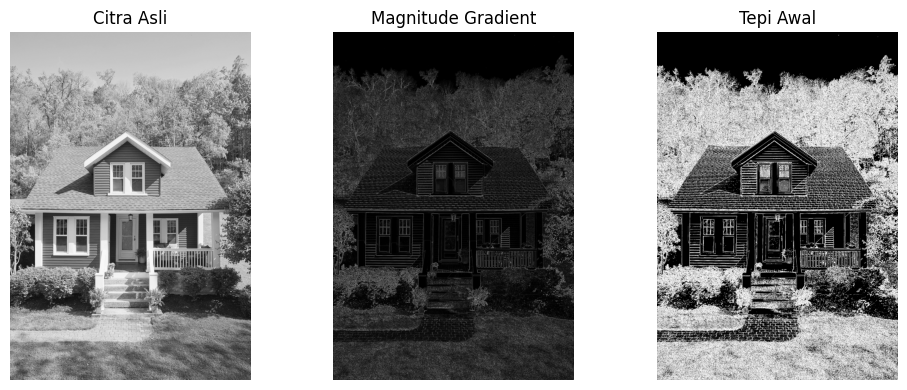

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# # Baca dan konversi ke grayscale
# img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Hitung gradient menggunakan Sobel
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x) * 180 / np.pi

# Thresholding magnitude untuk deteksi tepi awal
edges = (magnitude > 100).astype(np.uint8)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude Gradient'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(edges, cmap='gray'), plt.title('Tepi Awal'), plt.axis('off')
plt.tight_layout()
plt.show()

# Eksperimen Tambahan: Non-Maximum Suppression

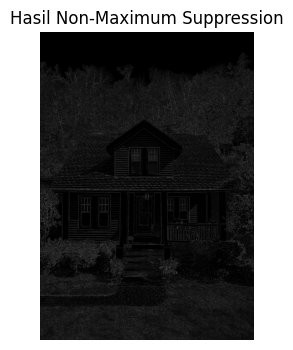

In [8]:
def non_max_suppression(magnitude, direction):
    M, N = magnitude.shape
    output = np.zeros((M, N), dtype=np.float32)
    angle = direction % 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255

            # arah 0°
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            # arah 45°
            elif (22.5 <= angle[i,j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            # arah 90°
            elif (67.5 <= angle[i,j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            # arah 135°
            elif (112.5 <= angle[i,j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                output[i,j] = magnitude[i,j]
            else:
                output[i,j] = 0
    return output

nms_result = non_max_suppression(magnitude, direction)

plt.figure(figsize=(6, 4))
plt.imshow(nms_result, cmap='gray')
plt.title('Hasil Non-Maximum Suppression')
plt.axis('off')
plt.show()

# Eksperimen: Pengaruh Ambang Magnitude
Eksperimen pengaruh ambang batas magnitude pada hasil penyambungan tepi:


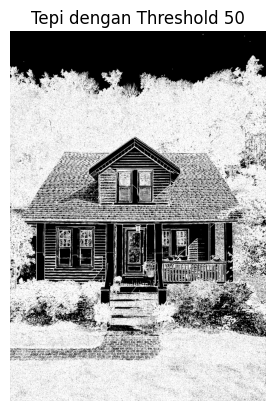

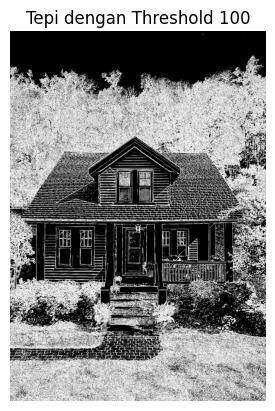

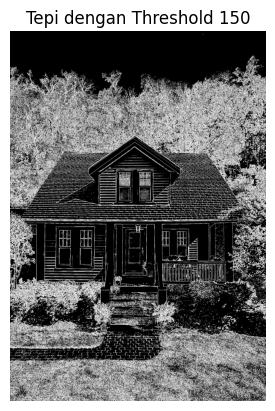

In [9]:
for thresh in [50, 100, 150]:
    edges = (magnitude > thresh).astype(np.uint8)
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Tepi dengan Threshold {thresh}')
    plt.axis('off')
    plt.show()